In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split
from scipy.stats import norm


def plot_curve(epochs, hist, list_of_metrics, name, title, label_list, savename=None):
    """Plot a curve of one or more classification metrics vs. epoch."""
    plt.figure(figsize=(8,5))
    mf = 18

    plt.title(title)
    plt.xlabel("Epoch "+name, fontsize=mf)
    plt.ylabel("mean absolute error", fontsize=mf)


    for (m, label) in zip(list_of_metrics, label_list):
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=label)
    plt.legend(fontsize=mf)
    if savename is not None:
        plt.savefig(f"plots/{savename}.eps", format="eps")


# for activation functions check https://keras.io/api/layers/activations/


# returns dataframe
def test_model(model, dataset, label_name, savename = None):
    features = {name: np.array(value) for name, value in dataset.items()}
    features.pop(label_name)
    label = dataset[label_name].to_numpy()
    print(label)
    evaluation = model.evaluate(x=features, y=label, batch_size=50, verbose=0)
    predicted = model.predict(features)

    df_test = pd.DataFrame(label, columns=[label_name])

    df_predict = pd.DataFrame(predicted, columns=[label_name+"_pred"])
    if savename is not None:
        savename=savename.replace(" ", "_")

        pd.concat([df_test, df_predict], axis=1).to_csv("errors/"+savename+".csv")

    return pd.concat([df_test, df_predict], axis=1)


def histogramm(testing_df, name, max_range, bins_val, y_max=0, savename=None):
    df_columns = testing_df.columns
    data = testing_df[df_columns[0]]-testing_df[df_columns[1]]
    mu, std = norm.fit(data)


    plt.figure(figsize=(8,5))
    mf = 18
    plt.hist(data, bins=bins_val)
    if max_range is not None:
        plt.xlim(-max_range, max_range)
    if(y_max != 0):
        plt.ylim(0, y_max)
    mu, std = norm.fit(data)

    plt.xlabel("Differenz", fontsize=mf)
    plt.title(name+" mean = %.4f,  std = %.4f" % (mu, std),fontsize=mf)
    if savename is not None:
        savename=savename.replace(" ", "_")
        plt.savefig("plots/hist/"+savename+".eps", format="eps")
    plt.show()


In [33]:
def generate_results(df, features, label, model_dir, model_name, max_range, num_bins):
    
    
    all_used_columns = features[:]
    all_used_columns.append(label)
    df__train, df_test = train_test_split(
        df[all_used_columns], test_size=0.20, random_state=42)
    # feature_columns_A = []

    my_model = tf.keras.models.load_model(model_dir)
    error = test_model(my_model, df_test, label, savename=model_name)

    print(error.head(50))  # change to save file
    histogramm(error, model_name, max_range, num_bins,savename=model_name)  # add save option


[0.22575758 0.18030303 0.21060606 0.17424242 0.16515152 0.15757576
 0.13636364 0.22424242 0.11818182 0.1030303  0.12272727 0.14848485
 0.20606061 0.15       0.23636364 0.10606061 0.21969697 0.21818182
 0.12121212 0.1469697 ]
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
      lambda  lambda_pred
0   0.225758     0.226174
1   0.180303     0.178186
2   0.210606     0.210178
3   0.174242     0.171599
4   0.165152     0.161876
5   0.157576     0.153722
6   0.136364     0.130198
7   0.224242     0.224606
8   0.118182     0.110046
9   0.103030     0.099162
10  0.122727     0.115979
11  0.148485     0.143685
12  0.206061     0.205473
13  0.150000     0.145253
14  0.236364     0.237140
15  0.106061     0.100978
16  0.219697     0.219901
17  0.218182     0.218333
18  0.121212     0.113545
19  0.146970     0.142117


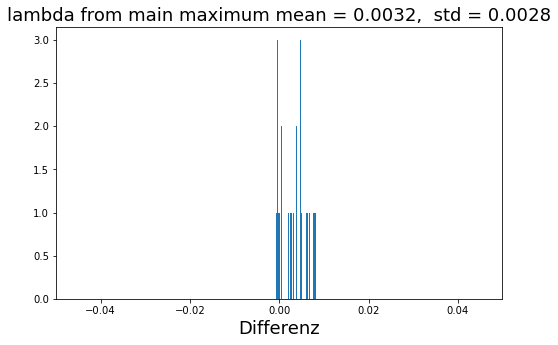

In [34]:
# lambda from main maximum
generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/lambda_100_steps.csv"),

    # configure labels and features
    features=["main_maximum"],
    label="lambda",

    # setup model or load model from file
    model_dir="../Models/lambda_100_best_model_main_max_err_0_0027",
    model_name="lambda from main maximum",

    # histogram options
    max_range=0.05,
    num_bins=30,

)


[0.5    0.5    0.5    ... 0.2333 0.5    0.2333]
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
    lambda  lambda_pred
0   0.5000     0.108402
1   0.5000     0.111900
2   0.5000     0.112962
3   0.3667     0.108277
4   0.3667     0.110151
5   0.1000     0.103552
6   0.5000     0.108089
7   0.3667     0.105063
8   0.2333     0.104163
9   0.5000     0.108589
10  0.2333     0.104468
11  0.5000     0.111026
12  0.2333     0.107839
13  0.3667     0.107590
14  0.1000     0.105354
15  0.1000     0.105257
16  0.2333     0.108402
17  0.2333     0.107777
18  0.5000     0.111213
19  0.5000     0.107839
20  0.5000     0.106777
21  0.2333     0.105791
22  0.2333     0.107714
23  0.1000     0.105257
24  0.3667     0.105986
25  0.5000     0.106617
26  0.2333     0.105743
27  0.3667     0.109214
28  0.5000     0.107652
29  0.3667     0.109964
30  0.1000     0.109839
31  0.3667     0.108589
32  0.3667     0.109151
33  0.3667     0.107402
34

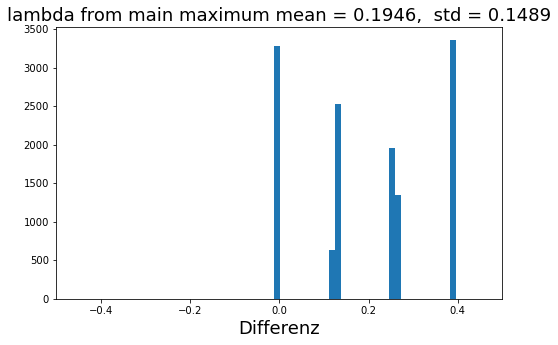

In [35]:
generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/all_param_4_values_with_overlap.csv"),

    # configure labels and features
    features=["main_maximum"],
    label="lambda",

    # setup model or load model from file
    model_dir="../Models/lambda_100_best_model_main_max_err_0_0027",
    model_name="lambda from main maximum",

    # histogram options
    max_range=0.5,
    num_bins=30,

)

[0.32808081 0.48969697 0.34626263 0.3240404  0.4169697  0.49171717
 0.40686869 0.34020202 0.50181818 0.49575758 0.41090909 0.43313131
 0.45333333 0.38868687 0.33212121]
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
       delta  delta_pred
0   0.328081    0.404054
1   0.489697    0.401819
2   0.346263    0.410790
3   0.324040    0.404054
4   0.416970    0.404054
5   0.491717    0.417188
6   0.406869    0.391457
7   0.340202    0.421612
8   0.501818    0.428704
9   0.495758    0.410790
10  0.410909    0.407196
11  0.433131    0.412810
12  0.453333    0.391457
13  0.388687    0.404054
14  0.332121    0.408432


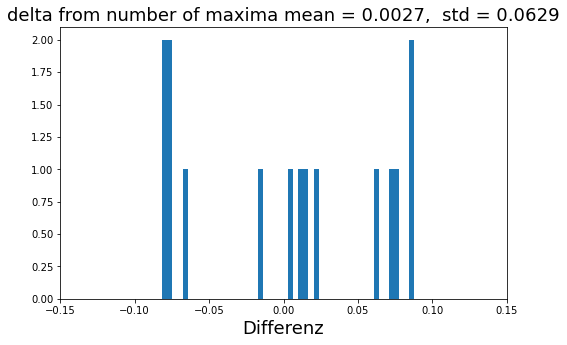

In [36]:
# lambda from main maximum
generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/delta_100_steps.csv"),

    # configure labels and features
    features=["no_of_max"],
    label="delta",

    # setup model or load model from file
    model_dir="../Models/delta_100_best_model_err_0_05",
    model_name="delta from number of maxima",

    # histogram options
    max_range=0.15,
    num_bins=50,

)

[0.4667 0.6    0.6    ... 0.5333 0.4667 0.4   ]
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
     delta  delta_pred
0   0.4667    0.410790
1   0.6000    0.429048
2   0.6000    0.391457
3   0.4667    0.391457
4   0.5333    0.391457
5   0.4000    0.429048
6   0.4667    0.429048
7   0.4000    0.429048
8   0.4000    0.429048
9   0.4667    0.429048
10  0.4000    0.429048
11  0.5333    0.410790
12  0.6000    0.421612
13  0.4667    0.410790
14  0.4667    0.426112
15  0.4667    0.429048
16  0.5333    0.429048
17  0.5333    0.429048
18  0.6000    0.429048
19  0.4667    0.410790
20  0.4667    0.426112
21  0.4667    0.426112
22  0.5333    0.429048
23  0.4667    0.429048
24  0.4667    0.426112
25  0.4000    0.410790
26  0.4000    0.410790
27  0.6000    0.421612
28  0.4667    0.429048
29  0.6000    0.426112
30  0.6000    0.429048
31  0.5333    0.429048
32  0.5333    0.391457
33  0.4667    0.410790
34  0.4000    0.429048
35  0.4000    

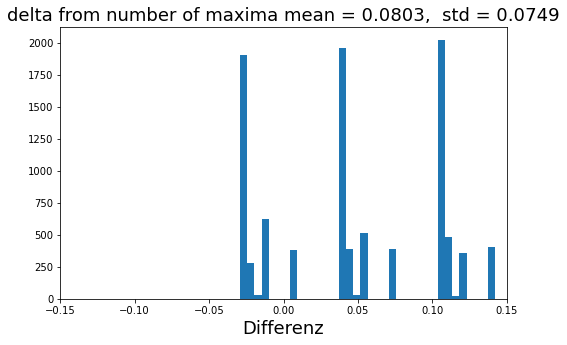

In [37]:
# lambda from main maximum
generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/all_param_4_values_with_overlap.csv"),

    # configure labels and features
    features=["no_of_max"],
    label="delta",

    # setup model or load model from file
    model_dir="../Models/delta_100_best_model_err_0_05",
    model_name="delta from number of maxima",

    # histogram options
    max_range=0.15,
    num_bins=50,

)

[0.4667 0.6    0.6    ... 0.5333 0.4667 0.4   ]
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
     delta  delta_pred
0   0.4667    0.410790
1   0.6000    0.429048
2   0.6000    0.391457
3   0.4667    0.391457
4   0.5333    0.391457
5   0.4000    0.429048
6   0.4667    0.429048
7   0.4000    0.429048
8   0.4000    0.429048
9   0.4667    0.429048
10  0.4000    0.429048
11  0.5333    0.410790
12  0.6000    0.421612
13  0.4667    0.410790
14  0.4667    0.426112
15  0.4667    0.429048
16  0.5333    0.429048
17  0.5333    0.429048
18  0.6000    0.429048
19  0.4667    0.410790
20  0.4667    0.426112
21  0.4667    0.426112
22  0.5333    0.429048
23  0.4667    0.429048
24  0.4667    0.426112
25  0.4000    0.410790
26  0.4000    0.410790
27  0.6000    0.421612
28  0.4667    0.429048
29  0.6000    0.426112
30  0.6000    0.429048
31  0.5333    0.429048
32  0.5333    0.391457
33  0.4667    0.410790
34  0.4000    0.429048
35  0.4000    

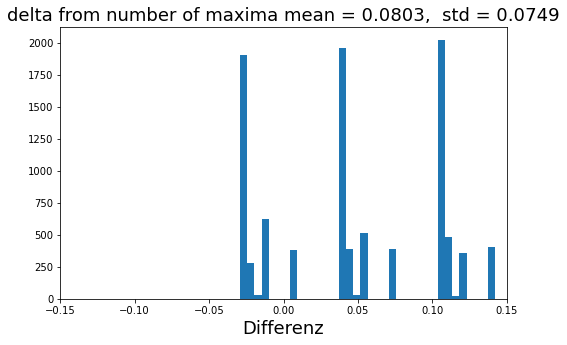

In [38]:
# all values form overlap 
all_labels_features=["delta","lambda","all_maxima","Intensity","overlap_s0_s2_k6a","overlap_s0_s2_k1","overlap_s0_s2_k9a"]


generate_results(
    # load and split Dataset
    df=pd.read_csv("../../generated_Data/all_param_4_values_with_overlap.csv"),

    # configure labels and features
    features=["no_of_max"],
    label="delta",

    # setup model or load model from file
    model_dir="../Models/delta_100_best_model_err_0_05",
    model_name="delta from number of maxima",

    # histogram options
    max_range=0.15,
    num_bins=50,

)